# HW3

Submitted by: Lior Sukman (ID 319124244) Efrat Kohen (ID 300385564) Mandy Rosemblaum (ID 305747230)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, confusion_matrix, plot_confusion_matrix
from math import sqrt

## Q1

a) Load the time series file "changepoint_ts.csv"

In [16]:
#Build Dataframe
df = pd.read_csv('changepoint_ts.csv') #How to upload data from web urls?
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   x           506 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.0 KB


b) Create the matrix L and calculate L^(-1)

In [24]:
data_points = df.shape[0]

L = np.identity(data_points)
for i in range(1, data_points):
   L[i, i - 1] = -1

L_inv = np.linalg.inv(L)

c) Solve the Lasso model and transform the result using the relation beta = L_inv * u. Find
the best lambda using cross-validation.

In [30]:
alphas = np.logspace(-4, 2, 28)
parameters = {'alpha': alphas}

labels = df['x'].copy()

model = linear_model.Lasso(max_iter = 10_000)
clf = GridSearchCV(model, parameters, cv = 5)
clf.fit(L_inv, labels)

print('best parameter is:') 
print(clf.best_params_)

best parameter is:
{'alpha': 0.000774263682681127}


In [32]:
alpha = clf.best_params_['alpha']
model = linear_model.Lasso(alpha = alpha, max_iter = 10_000)
model.fit(L_inv, labels)

betta = np.dot(L_inv, model.coef_) + model.intercept_

d) Plot the fitted model as in the figure above.

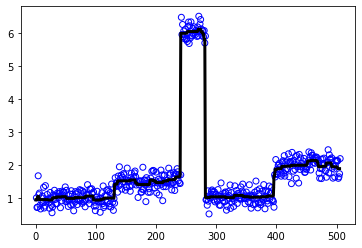

In [42]:
plt.scatter(df.to_numpy()[:,0], labels, facecolors='none', edgecolors='b')
plt.plot(betta, color = 'k', linewidth = 3)
plt.show()

## Q2

In [179]:
#Build Dataframe with the requierd features
df = pd.read_csv('data.txt') #How to upload data from web urls? 
data = df[["Arrest", "Date", "Year", "Primary Type", "Location Description", "Domestic", "Beat", "District", "Ward", "Community Area", "FBI Code"]]

(b) Transform the categorical variables to binary variables ("one-hot encoding").

In [180]:
#Build Dataframes of binary variables and join with data 
categorical_variables = ["Primary Type", 'Domestic', 'District', 'Ward', 'FBI Code'] #which features do you think is categorial?
df_list = []
for categoria in categorical_variables:
    df = pd.get_dummies(data[categoria], prefix=categoria, drop_first=True)
    data = pd.concat([data, df] ,axis=1)
    data = data.drop(columns=[categoria])

In [181]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 127 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Arrest                                          9999 non-null   bool  
 1   Date                                            9999 non-null   object
 2   Year                                            9999 non-null   int64 
 3   Location Description                            9993 non-null   object
 4   Beat                                            9999 non-null   int64 
 5   Community Area                                  9999 non-null   int64 
 6   Primary Type_ASSAULT                            9999 non-null   uint8 
 7   Primary Type_BATTERY                            9999 non-null   uint8 
 8   Primary Type_BURGLARY                           9999 non-null   uint8 
 9   Primary Type_CONCEALED CARRY LICENSE VIOLATION  999

(c) Transform the date to day in week, hour in day, month in year

In [182]:
#Don't you think these categoreis should be "one-hot encoding" as well?
data.insert(1, 'Date_object', pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p'))
data.insert(1, 'Hour', pd.DatetimeIndex(data['Date_object']).hour)
data.insert(2, 'week_day', data['Date_object'].dt.dayofweek)
data.insert(3, 'Month', pd.DatetimeIndex(data['Date_object']).month)
data = data.drop(columns=['Date', 'Date_object'])

In [183]:
data

,Arrest,Hour,week_day,Month,Year,Location Description,Beat,Community Area,Primary Type_ASSAULT,Primary Type_BATTERY,...,FBI Code_14,FBI Code_15,FBI Code_16,FBI Code_17,FBI Code_18,FBI Code_19,FBI Code_20,FBI Code_22,FBI Code_24,FBI Code_26
0,True,23,6,2,2015,STREET,422,46,0,0,...,0,0,0,0,1,0,0,0,0,0
1,True,23,6,2,2015,APARTMENT,522,53,0,1,...,0,0,0,0,0,0,0,0,0,0
2,True,23,6,2,2015,SIDEWALK,1522,25,0,0,...,0,0,0,0,1,0,0,0,0,0
3,True,23,6,2,2015,STREET,321,42,0,0,...,0,0,0,0,1,0,0,0,0,0
4,False,23,6,2,2015,APARTMENT,1513,25,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,False,8,4,1,2015,"SCHOOL, PUBLIC, BUILDING",835,70,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,True,8,4,1,2015,APARTMENT,321,42,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,False,8,4,1,2015,APARTMENT,414,46,0,1,...,0,0,0,0,0,0,0,0,0,0
9997,False,8,4,1,2015,RESIDENTIAL YARD (FRONT/BACK),623,44,1,0,...,0,0,0,0,0,0,0,0,0,0


(a) Split to training set and test set (80%-20%)

In [186]:
def split_df (target_name: str, data: pd.DataFrame):
    """ 
    Split df into random train and test subsets based on target name column

    Parameters
    ----------
    target_name : str
        target column name
    data : DataFrame
        DataFrame  

    return
    ----------
    X_train, X_test, y_train, y_test
    """
    X = data.drop(columns=[target_name])
    y = data[target_name].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [187]:
target_name = "Arrest"
X_train, X_test, y_train, y_test = split_df(target_name, data)